# Wholesale Loyalty Program

Company is a small food service supply wholesaler that services the hotel/restaurant and retail channels.

The company is designing a customer loyalty program (e.g the one that incentivizes customers to purchase across multiple offering categories)

You need to: examine annual spending by the company's current customers to understand if such program would be attractive to the largest subgroup of customers.

Things to look at:
1. current spending patterns across offering categories
2. annual spending across channels (hotel/restaurant vs. retail)
3. different subgroups of customers
4. spendings of each customer - first year vs. second year

### The Data

CUST_ID: Customer ID

YEAR: Year

FRESH: annual spending on fresh products

DAIRY: annual spending on dairy products

GROCERY: annual spending on grocery products

FROZEN: annual spending on frozen products

DETERGENTS_PAPER: annual spending on detergents and paper products

DELI: annual spending on delicatessen products

CHANNEL: HoReCa (hotel/restaurant) or Retail

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("wholesale_data.csv")
df.head()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669,9656,7561,214,2674,1338
1,2,9336325,2017,7057,9810,9568,1762,3293,1776
2,2,6272942,2017,6353,8808,7684,2405,3516,7844
3,1,7856217,2017,13265,1196,4221,6404,507,1788
4,2,6179511,2017,22615,5410,7198,3915,1777,5185


In [95]:
df['Channel'].unique()

array([2, 1], dtype=int64)

## 1. Data cleaning

In [96]:
df.isna().any()

Channel             False
Customer            False
Year                False
Fresh                True
Milk                 True
Grocery              True
Frozen               True
Detergents_Paper     True
Delicassen           True
dtype: bool

There are non-numerical value. For example, some fields contain: unrecorded - category, some are NaN. Year column contains different date formats.

In [97]:
df[df['Fresh'] == 'unrecorded']

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
12,2,9012181,2017,unrecorded,12319,11757,287,3881,2931
414,1,2272718,2017,unrecorded,1990,3417,5679,1135,290


In [98]:
df[df['Milk'] == 'unrecorded']

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
133,1,4289818,2017,9434,unrecorded,1235,436,256,396
159,2,8778659,2017,355,unrecorded,14682,398,8077,303
521,2,3909873,08/01/2016,123,unrecorded,9794,164,7271,89


In [99]:
# unrecorded and NaN values replaced with zeros - not too many of these (zeros or eliminate these?)
df.Fresh = df.Fresh.replace('unrecorded', 0)
df.Milk = df.Milk.replace('unrecorded', 0)
df.Grocery = df.Grocery.replace('unrecorded', 0)
df.Frozen = df.Frozen.replace('unrecorded', 0)
df.Detergents_Paper = df.Detergents_Paper.replace('unrecorded', 0)
df.Delicassen = df.Delicassen.replace('unrecorded', 0)

In [100]:
df.Fresh = df.Fresh.replace('NaN',0)

In [101]:
# Year column contains different formats, adjusting that here
df['Year'].unique()

array(['2017', '08/01/2016'], dtype=object)

In [102]:
df.Year = df.Year.replace('08/01/2016','2016')

In [103]:
# to confirm there are no other non numerical entries
df = df.apply(pd.to_numeric)

In [104]:
# haven't found any duplicates
df.duplicated().any()

False

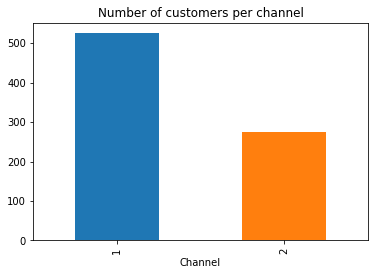

In [105]:
#number of customers per channel 
df.groupby('Channel').Customer.count().plot.bar(title = 'Number of customers per channel')
plt.show()

In [106]:
df.columns

Index(['Channel', 'Customer', 'Year', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [110]:
select_columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

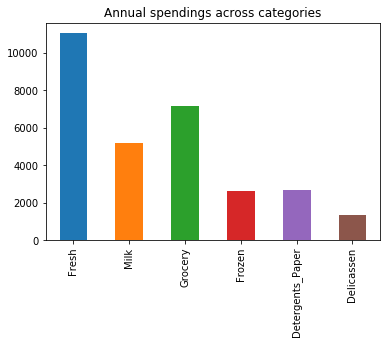

In [111]:
#Annual spendings across categories - total
df
df[select_columns].mean().plot.bar(title = "Annual spendings across categories")

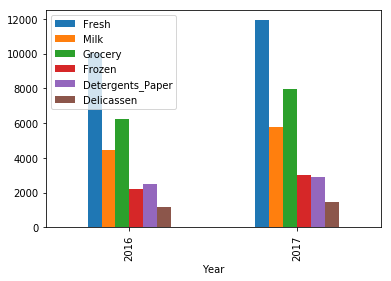

In [114]:
# Comparisons between 2016 and 2017
select_columns_2 = ['Year','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
df_values = df[select_columns_2]
df_values.groupby('Year').mean().plot.bar()

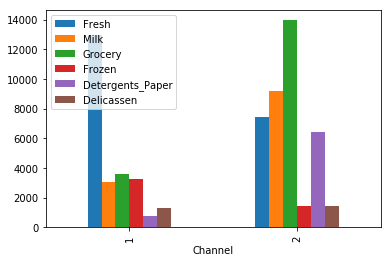

In [117]:
#comparison of different spending channels (hotels/restaurants vs retail)
select_columns_3 = ['Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
df_values = df[select_columns_3]
df_values.groupby('Channel').mean().plot.bar()

In [128]:
new_frame = df_values.groupby('Channel').mean()

In [129]:
new_frame

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
1,12942.689524,3058.432122,3598.191571,3287.607280,751.051625,1289.455939
2,7454.255474,9220.345455,13956.278986,1449.452899,6402.920290,1447.320000
